## We look at parameter estimates with and without Procrustes alignment 

In [1]:
import os
from physhapes.mcmc import load_mcmc_results
import numpy as np
import matplotlib.pyplot as plt

In [2]:
burnin_percent = 0.3
path = "unit_root/sigma=0.3_alpha=0.005_dt=0.05/all" 
alphas_mean=[]
alphas_mean_proc=[]
alphas_mean_true = []

sigmas_mean = []
sigmas_mean_proc = []
sigmas_mean_true = []

alphas_diff = []
sigmas_diff = []

In [3]:
def dicts_equal_except(d1, d2, exclude_keys):
    d1_filtered = {k: v for k, v in d1.items() if k not in exclude_keys}
    d2_filtered = {k: v for k, v in d2.items() if k not in exclude_keys}
    return d1_filtered == d2_filtered

In [4]:
# mcmc settings
chain_results = load_mcmc_results(path + "/seed=216617605/mcmc/id=595137635/*.pkl")
reference = chain_results[0]['settings']
print(reference)
dicts_equal_except(chain_results[0]['settings'], chain_results[1]['settings'], exclude_keys='seed_mcmc')

Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=216617605/mcmc/id=595137635/results_chain=106322075.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=216617605/mcmc/id=595137635/results_chain=711201682.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=216617605/mcmc/id=595137635/results_chain=813170715.pkl
{'N': 3000, 'dt': 0.05, 'lambd': 0.95, 'obs_var': 0.0001, 'rb': 1.0, 'seed_mcmc': 106322075, 'prior_sigma_min': 0.0, 'prior_sigma_max': 1.0, 'prior_alpha_min': 0.0, 'prior_alpha_max': 0.03, 'proposal_sigma_tau': 0.1, 'proposal_alpha_tau': 0.005, 'tree_string': '((0:4.1,1:4.1):3.5,(2:5.9,(3:4.2,4:4.2):1.7):1.7);', 'outputpath': 'unit_root/sigma=0.3_alpha=0.005_dt=0.05/beatty-050925/seed=216617605/mcmc/id=595137635', 'use_wandb': True, 'wandb_project': 'SPMS_MCMC'}


True

In [7]:
#mcmc_id = "id=595137635"
for dataset in os.listdir(path):
    if "_" in dataset:
        continue
    for mcmc_id in os.listdir(os.path.join(path, dataset,"mcmc")):
        print(f"mcmc id: {mcmc_id}")
        results_path = os.path.join(path, dataset, "mcmc", mcmc_id, "*.pkl")
        chain_results = load_mcmc_results(results_path)
        # test that the settings for mcmc is the same across all chains and data sets
        for i in range(len(chain_results)):
            assert dicts_equal_except(reference, chain_results[i]['settings'], exclude_keys=['seed_mcmc', 'outputpath'])

        cur_alphas = [chain_results[i]['alpha'][int(burnin_percent*len(chain_results[0]['alpha'])):] for i in range(len(chain_results))]
        cur_sigmas = [chain_results[i]['sigma'][int(burnin_percent*len(chain_results[0]['sigma'])):] for i in range(len(chain_results))]
        alphas_mean.append(np.mean(np.array(cur_alphas).flatten()))
        sigmas_mean.append(np.mean(np.array(cur_sigmas).flatten()))

    for mcmc_id in os.listdir(os.path.join(path, dataset,"mcmc_true_root_rb=0.05")):
        print(f"mcmc id (true): {mcmc_id}")
        results_path = os.path.join(path, dataset, "mcmc_true_root_rb=0.05", mcmc_id, "*.pkl")
        chain_results = load_mcmc_results(results_path)
        # test that the settings for mcmc is the same across all chains and data sets
        #for i in range(len(chain_results)):
        #    assert dicts_equal_except(reference, chain_results[i]['settings'], exclude_keys=['seed_mcmc', 'outputpath'])

        cur_alphas = [chain_results[i]['alpha'][int(burnin_percent*len(chain_results[0]['alpha'])):] for i in range(len(chain_results))]
        cur_sigmas = [chain_results[i]['sigma'][int(burnin_percent*len(chain_results[0]['sigma'])):] for i in range(len(chain_results))]
        alphas_mean_true.append(np.mean(np.array(cur_alphas).flatten()))
        sigmas_mean_true.append(np.mean(np.array(cur_sigmas).flatten()))

            
    for mcmc_id in os.listdir(os.path.join(path, dataset,"mcmc_procrustes")):
        print(f"mcmc id (procrustes): {mcmc_id}")
        results_path = os.path.join(path, dataset, "mcmc_procrustes", mcmc_id, "*.pkl")
        chain_results = load_mcmc_results(results_path)
        for i in range(len(chain_results)):
            assert dicts_equal_except(reference, chain_results[i]['settings'], exclude_keys=['seed_mcmc', 'outputpath'])

        
        cur_alphas = [chain_results[i]['alpha'][int(burnin_percent*len(chain_results[0]['alpha'])):] for i in range(len(chain_results))]
        cur_sigmas = [chain_results[i]['sigma'][int(burnin_percent*len(chain_results[0]['sigma'])):] for i in range(len(chain_results))]
        alphas_mean_proc.append(np.mean(np.array(cur_alphas).flatten()))
        sigmas_mean_proc.append(np.mean(np.array(cur_sigmas).flatten()))
            
    

mcmc id: id=595137635
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc/id=595137635/results_chain=89181905.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc/id=595137635/results_chain=902748578.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc/id=595137635/results_chain=923346238.pkl
mcmc id (true): id=848138800
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc_true_root_rb=0.05/id=848138800/results_chain=232565448.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc_true_root_rb=0.05/id=848138800/results_chain=595847756.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc_true_root_rb=0.05/id=848138800/results_chain=72020069.pkl
mcmc id (procrustes): id=595137635
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=869083029/mcmc_procrustes/id=595137635/results_chain=23791830.pkl
Loading unit_root/sigma=0.3_alpha=0.005_dt=0.05/all/seed=8690

In [8]:
alphas_mean_true

[np.float64(0.006266242743116779),
 np.float64(0.006266242743116779),
 np.float64(0.003371567725106115),
 np.float64(0.004550706306960763),
 np.float64(0.007723919106540986),
 np.float64(0.009750137702787542),
 np.float64(0.009400702446916938),
 np.float64(0.00899303300480113),
 np.float64(0.007725114851549336),
 np.float64(0.0043015776740071765),
 np.float64(0.008123116226556253),
 np.float64(0.0076490332190447975),
 np.float64(0.005553121339683717),
 np.float64(0.004219555348088731),
 np.float64(0.0080125102157968),
 np.float64(0.006398918214350863),
 np.float64(0.006867802792817429),
 np.float64(0.006844969462228319),
 np.float64(0.010802234606001737),
 np.float64(0.008563462209481613),
 np.float64(0.007462596865096038)]

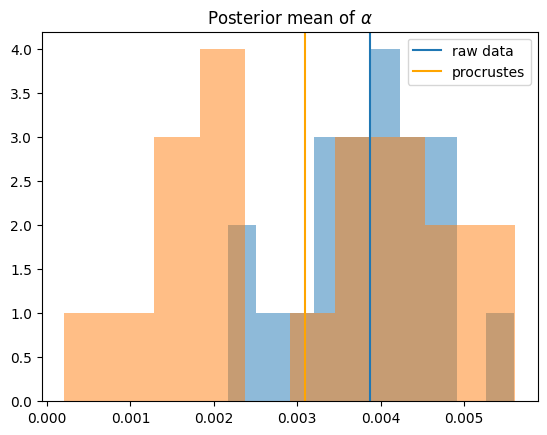

In [65]:
plt.hist(alphas_mean, alpha=0.5)
plt.hist(alphas_mean_proc, alpha=0.5)
plt.axvline(np.mean(alphas_mean), label="raw data")
plt.axvline(np.mean(alphas_mean_proc), label="procrustes", color="orange")
plt.title(r"Posterior mean of $\alpha$")
plt.legend()
plt.savefig("alpha_procrustes_vs_raw.pdf")

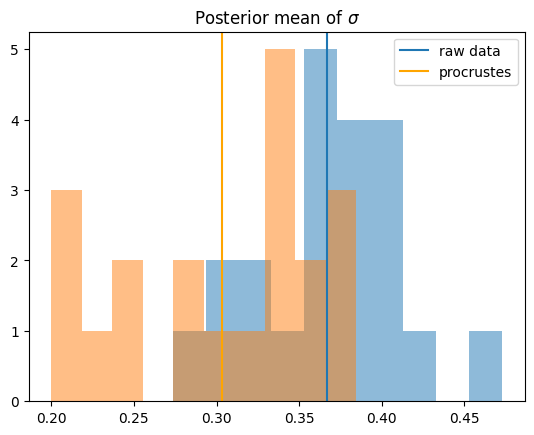

In [66]:
plt.hist(sigmas_mean, alpha=0.5)
plt.hist(sigmas_mean_proc, alpha=0.5)
plt.axvline(np.mean(sigmas_mean), label="raw data")
plt.axvline(np.mean(sigmas_mean_proc), label="procrustes", color="orange")

plt.title(r"Posterior mean of $\sigma$")
plt.legend()
plt.savefig("sigma_procrustes_vs_raw.pdf")